In [1]:
# back to project root
%cd ~/research

import gc
import os
import sys
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import yaml

sys.path.append("src")
from utility.logger import logger
from utility.activity_loader import load_group
from utility.json_handler import load
from utility.video import Capture, Writer, concat_field_with_frame
from visualize.group import GroupVisualizer
from visualize.individual import write_field as ind_write_field
from visualize.keypoint import write_frame as kps_write_frame

/home/k2111/research


/home/k2111/research/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
room_num = "08"
surgery_num = "001"

In [3]:
cfg_path = "config/demo_config.yaml"
with open(cfg_path, "r") as f:
    cfg = yaml.safe_load(f)
with open(cfg["config_path"]["group"], "r") as f:
    grp_cfg = yaml.safe_load(f)

In [4]:
field = cv2.imread("image/field.png")

In [5]:
data_dir = os.path.join("data", room_num, surgery_num)
data_dirs = sorted(glob(os.path.join(data_dir, "*")))
for i in range(len(data_dirs)):
    if data_dirs[i].endswith("passing") or data_dirs[i].endswith("attention"):
        del data_dirs[i]
print(data_dirs)

['data/08/001/01', 'data/08/001/02', 'data/08/001/03', 'data/08/001/04', 'data/08/001/05', 'data/08/001/06', 'data/08/001/07', 'data/08/001/08', 'data/08/001/09', 'data/08/001/10', 'data/08/001/11', 'data/08/001/12', 'data/08/001/13', 'data/08/001/14', 'data/08/001/15', 'data/08/001/16', 'data/08/001/17']


In [13]:
def create_attention_timeflow(group, freq=30):
    heatmap_dict = group.attention
    heatmap_lst = list(heatmap_dict.values())
    # heatmap_lst = heatmap_lst[::freq]
    
    max_values = []
    mean_values = []
    sum_values = []
    for heatmap in heatmap_lst:
        max_values.append(np.max(heatmap))
        mean_values.append(np.mean(heatmap))
        sum_values.append(np.sum(heatmap))
        
    return {"max": max_values, "mean": mean_values, "sum": sum_values}

In [14]:
timeflow = {"max":[], "mean": [], "sum": []}
for data_dir in data_dirs:
    print(data_dir)
    json_path = os.path.join(data_dir, ".json", "group.json")
    if os.path.exists(json_path):
        group = load_group(json_path, grp_cfg, field, logger, device="cpu")
        result = create_attention_timeflow(group)
        for key in timeflow.keys():
            timeflow[key] += result[key]

2022-05-30 16:39:16,709 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:39:16 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/01


2022-05-30 16:39:19,389 => loading attention result
2022-05-30 16:39:19 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1409672/1409672 [00:03<00:00, 381158.19it/s]
2022-05-30 16:39:23,602 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:39:23 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/02


2022-05-30 16:39:31,531 => loading attention result
2022-05-30 16:39:31 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3388597/3388597 [00:08<00:00, 386113.99it/s]
2022-05-30 16:39:41,037 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:39:41 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/03


2022-05-30 16:39:54,960 => loading attention result
2022-05-30 16:39:54 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6743152/6743152 [00:16<00:00, 397145.11it/s]
2022-05-30 16:40:12,711 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:40:12 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/04


2022-05-30 16:40:26,664 => loading attention result
2022-05-30 16:40:26 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6709539/6709539 [00:16<00:00, 398222.94it/s]
2022-05-30 16:40:44,291 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:40:44 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/05


2022-05-30 16:40:59,776 => loading attention result
2022-05-30 16:40:59 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7826526/7826526 [00:19<00:00, 399701.43it/s]
2022-05-30 16:41:20,134 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:41:20 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/06


2022-05-30 16:41:37,096 => loading attention result
2022-05-30 16:41:37 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8429809/8429809 [00:21<00:00, 397364.29it/s]
2022-05-30 16:41:59,081 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:41:59 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/07


2022-05-30 16:42:15,106 => loading attention result
2022-05-30 16:42:15 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7455878/7455878 [00:18<00:00, 397082.99it/s]
2022-05-30 16:42:34,638 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:42:34 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/08


2022-05-30 16:42:50,899 => loading attention result
2022-05-30 16:42:50 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8121085/8121085 [00:20<00:00, 397488.87it/s]
2022-05-30 16:43:12,103 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:43:12 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/09


2022-05-30 16:43:30,092 => loading attention result
2022-05-30 16:43:30 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9034832/9034832 [00:22<00:00, 399069.71it/s]
2022-05-30 16:43:53,521 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:43:53 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/10


2022-05-30 16:44:09,601 => loading attention result
2022-05-30 16:44:09 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6990152/6990152 [00:17<00:00, 395247.61it/s]
2022-05-30 16:44:28,057 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:44:28 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/11


2022-05-30 16:44:43,679 => loading attention result
2022-05-30 16:44:43 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7671992/7671992 [00:19<00:00, 397458.62it/s]
2022-05-30 16:45:03,781 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:45:03 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/12


2022-05-30 16:45:20,940 => loading attention result
2022-05-30 16:45:20 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8775436/8775436 [00:22<00:00, 398689.33it/s]
2022-05-30 16:45:43,753 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:45:43 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/13


2022-05-30 16:46:02,516 => loading attention result
2022-05-30 16:46:02 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9535673/9535673 [00:23<00:00, 400066.19it/s]
2022-05-30 16:46:27,126 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:46:27 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/14


2022-05-30 16:46:44,200 => loading attention result
2022-05-30 16:46:44 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7644031/7644031 [00:19<00:00, 393324.65it/s]
2022-05-30 16:47:04,459 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:47:04 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/15


2022-05-30 16:47:21,616 => loading attention result
2022-05-30 16:47:21 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8737212/8737212 [00:21<00:00, 397618.47it/s]
2022-05-30 16:47:44,382 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:47:44 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/16


2022-05-30 16:48:00,905 => loading attention result
2022-05-30 16:48:00 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7601768/7601768 [00:19<00:00, 395484.78it/s]
2022-05-30 16:48:20,902 => load passing detector from config/passing/pass_model_lstm_f1.yaml
2022-05-30 16:48:20 [INFO]: => load passing detector from config/passing/pass_model_lstm_f1.yaml


data/08/001/17


2022-05-30 16:48:30,746 => loading attention result
2022-05-30 16:48:30 [INFO]: => loading attention result
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5030338/5030338 [00:12<00:00, 394652.16it/s]


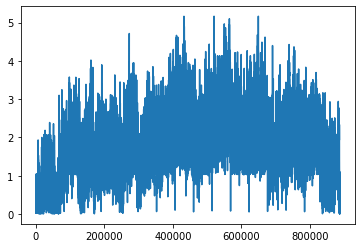

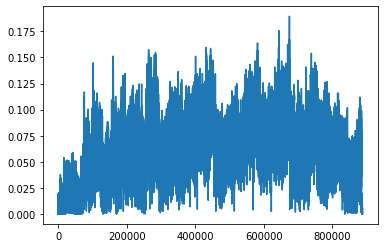

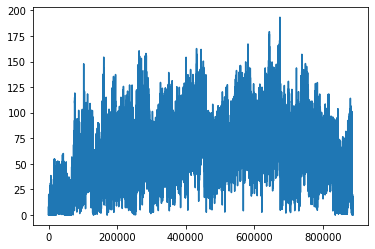

In [15]:
plt.plot(timeflow["max"], label="max")
plt.show()
plt.plot(timeflow["mean"], label="mean")
plt.show()
plt.plot(timeflow["sum"], label="sum")
plt.show()